In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# load data
training = pd.read_csv('training_data.csv', sep=';')
test = pd.read_csv('test_data.csv', sep=';')

Text(0.5, 1.0, 'Sine wave with wavelength 20.00 and phase 14.43')

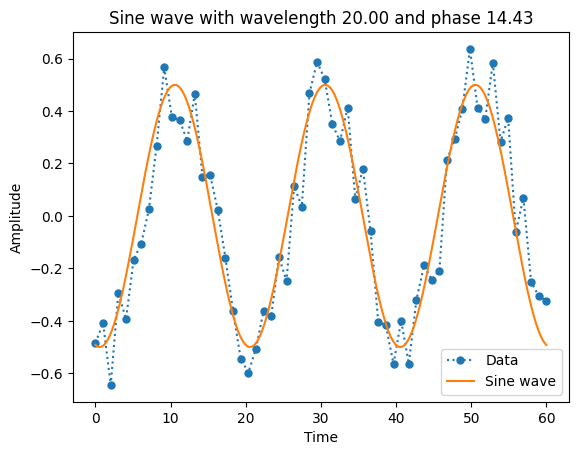

In [14]:
# Get the first row of the training data
row = training.iloc[2, :]
wavelegth = row[0]
phase = row[1]
row = row[2:]
x_range = len(row)
A = 0.5

plt.clf()
# Plot the first row, excluding the first two columns as points
x = np.linspace(0, x_range, x_range)
plt.plot(x, row, 'o:', markersize=5, label='Data')

x = np.linspace(0, x_range, x_range*5)
y = A*np.sin((x+phase)*2*np.pi/wavelegth)
plt.plot(x, y, label='Sine wave')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(f'Sine wave with wavelength {wavelegth:.2f} and phase {phase:.2f}')


In [70]:
# load data
loss_5 = pd.read_csv('results/nn/variable/5_loss.csv', sep=';', header=None).T
pred_5 = pd.read_csv('results/nn/variable/5_pred.csv', sep=';', header=None).T
loss_10 = pd.read_csv('results/nn/variable/10_loss.csv', sep=';', header=None).T
pred_10 = pd.read_csv('results/nn/variable/10_pred.csv', sep=';', header=None).T
pred_20 = pd.read_csv('results/nn/variable/20_pred.csv', sep=';', header=None).T
loss_20 = pd.read_csv('results/nn/variable/20_loss.csv', sep=';', header=None).T
loss_60 = pd.read_csv('results/nn/variable/60_loss.csv', sep=';', header=None).T
pred_60 = pd.read_csv('results/nn/variable/60_pred.csv', sep=';', header=None).T

lm_fixed_5 = pd.read_csv('results/lr/variable/5.csv', sep=';', header=None).T
lm_fixed_10 = pd.read_csv('results/lr/variable/10.csv', sep=';', header=None).T
lm_fixed_20 = pd.read_csv('results/lr/variable/20.csv', sep=';', header=None).T
lm_fixed_60 = pd.read_csv('results/lr/variable/60.csv', sep=';', header=None).T

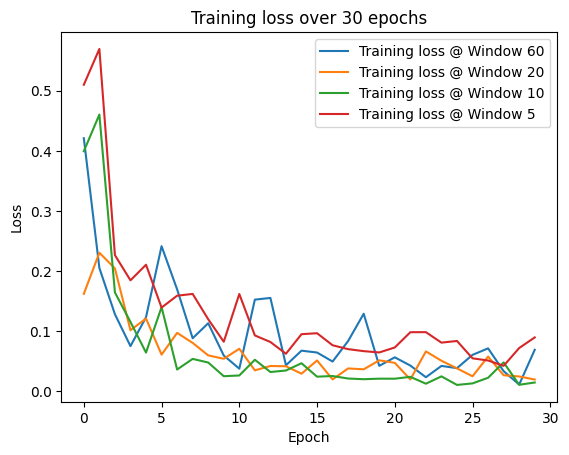

In [71]:
# Plot the loss
plt.clf()
plt.plot(loss_60[0:30], label='Training loss @ Window 60')
plt.plot(loss_20[0:30], label='Training loss @ Window 20')
plt.plot(loss_10[0:30], label='Training loss @ Window 10')
plt.plot(loss_5[0:30], label='Training loss @ Window 5')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over 30 epochs')
plt.legend()


Text(0.5, 1.0, 'Neural Network Prediction vs Actual For Sine Wave with Wavelength 30')

<Figure size 640x480 with 0 Axes>

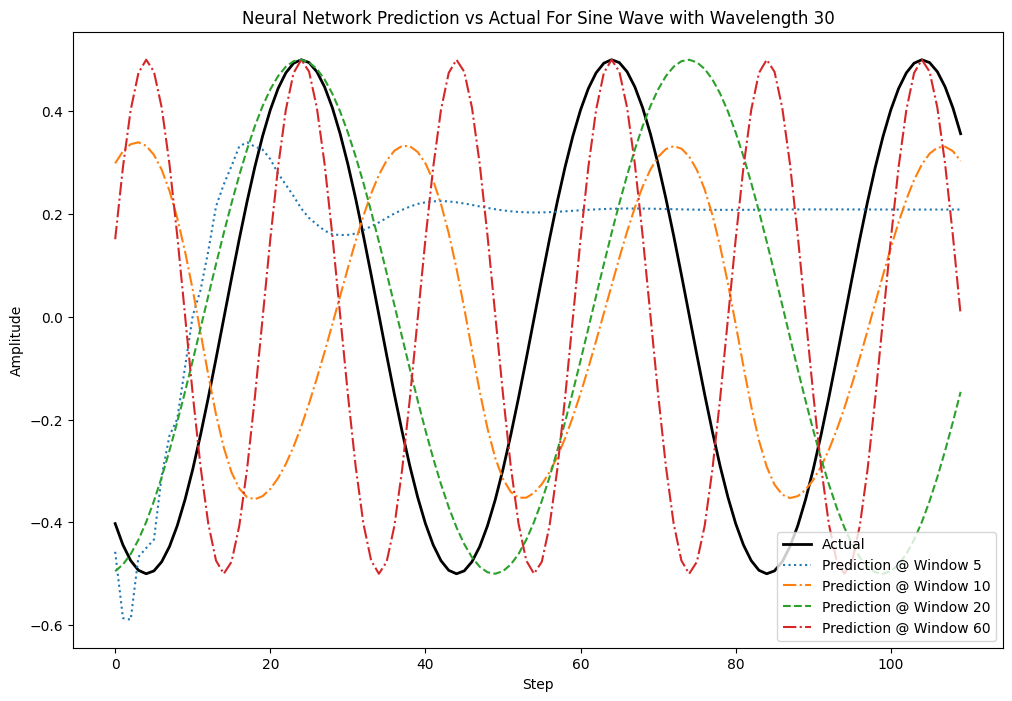

In [79]:

# Plot the prediction, only the first 100 points of the first column
plt.clf()
plt.figure(figsize=(12,8))
r = 110
# plot sine wave with wavelenght 30
plt.plot(pred_5.iloc[0:r,1], label='Actual', color='black', linewidth=2)
plt.plot(pred_5.iloc[0:r,0], label='Prediction @ Window 5', linestyle=':')

shift_10 = np.argmax(pred_5.iloc[0:r,1].values) - np.argmax(pred_10.iloc[0:r,1].values)
plt.plot(pred_10.iloc[0:r-shift_10,0].shift(shift_10), label='Prediction @ Window 10', linestyle='-.')


shift_20 = np.argmax(pred_5.iloc[0:r,1].values) - np.argmax(pred_20.iloc[0:r,1].values)
plt.plot(pred_20.iloc[0:r-shift_20,1].shift(shift_20), label='Prediction @ Window 20', linestyle='--')

shift_60 = np.argmax(pred_5.iloc[0:r,1].values) - np.argmax(pred_60.iloc[0:r,1].values)
plt.plot(pred_60.iloc[0:r-shift_60,1].shift(shift_60), label='Prediction @ Window 60', linestyle='-.')

plt.xlabel('Step')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Neural Network Prediction vs Actual For Sine Wave with Wavelength 30')

<Figure size 640x480 with 0 Axes>

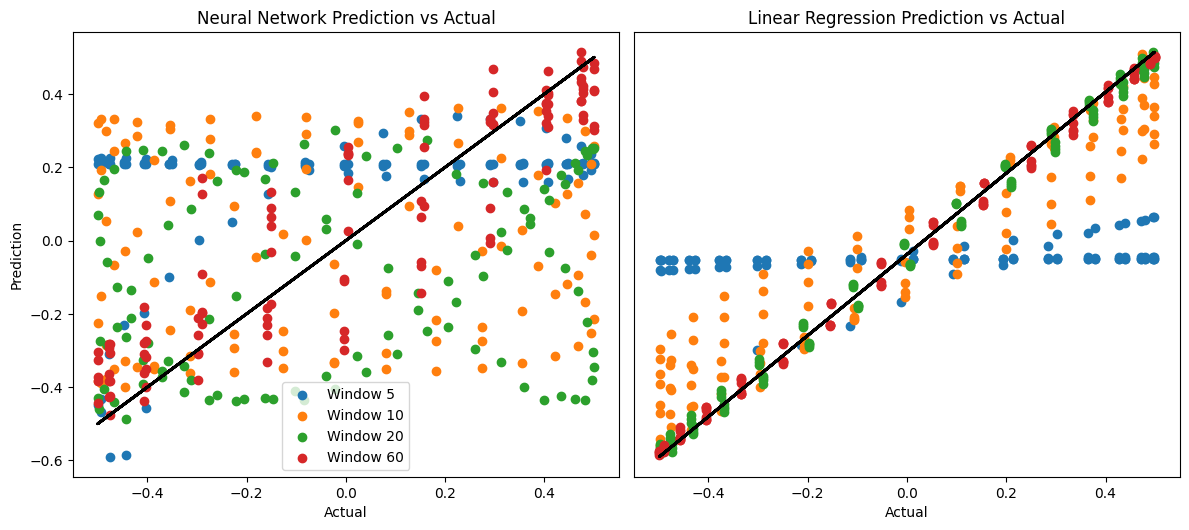

In [80]:
# Plot the residuals vs prediction in a scatter plot
plt.clf()
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.scatter(pred_5.iloc[0:r,1], pred_5.iloc[0:r,0], label='Window 5')
plt.scatter(pred_10.iloc[0:r,1], pred_10.iloc[0:r,0], label='Window 10')
plt.scatter(pred_20.iloc[0:r,1], pred_20.iloc[0:r,0], label='Window 20')
plt.scatter(pred_60.iloc[0:r,1], pred_60.iloc[0:r,0], label='Window 60')
plt.plot(pred_5.iloc[0:r,1], pred_5.iloc[0:r,1], color='black', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend()
plt.title('Neural Network Prediction vs Actual')
plt.subplot(2,2,2)
plt.scatter(lm_fixed_5.iloc[0:r,1], lm_fixed_5.iloc[0:r,0], label='Window 5')
plt.scatter(lm_fixed_10.iloc[0:r,1], lm_fixed_10.iloc[0:r,0], label='Window 10')
plt.scatter(lm_fixed_20.iloc[0:r,1], lm_fixed_20.iloc[0:r,0], label='Window 20')
plt.scatter(lm_fixed_60.iloc[0:r,1], lm_fixed_60.iloc[0:r,0], label='Window 60')
plt.plot(lm_fixed_5.iloc[0:r,1], lm_fixed_5.iloc[0:r,1], color='black', linewidth=2)
plt.xlabel('Actual')
plt.title('Linear Regression Prediction vs Actual')
plt.yticks([])
plt.tight_layout()

Text(0.5, 1.0, 'Linear Model Prediction vs Actual For Sine Wave with Wavelength 30')

<Figure size 640x480 with 0 Axes>

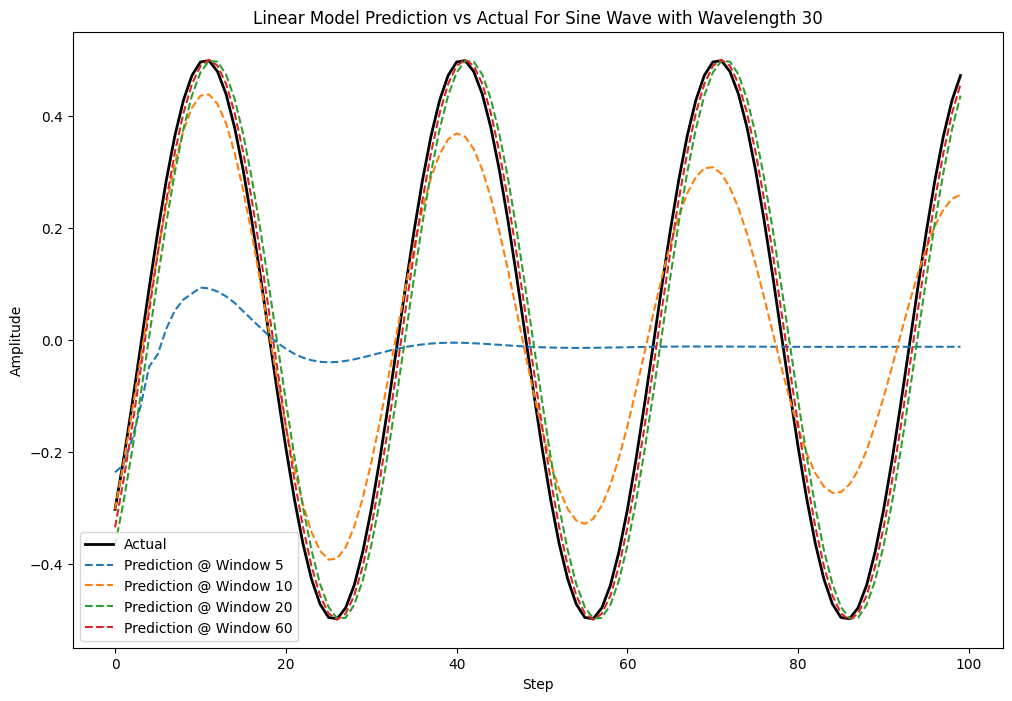

In [49]:

# Plot the prediction, only the first 100 points of the first column
plt.clf()
plt.figure(figsize=(12,8))
r = 100
# plot sine wave with wavelenght 30
plt.plot(lm_fixed_5.iloc[0:r,1], label='Actual', color='black', linewidth=2)
plt.plot(lm_fixed_5.iloc[0:r,0], label='Prediction @ Window 5', linestyle='--')

shift_10 = np.argmax(lm_fixed_5.iloc[0:r,1].values) - np.argmax(lm_fixed_10.iloc[0:r,1].values)
plt.plot(lm_fixed_10.iloc[0:r-shift_10,0].shift(shift_10), label='Prediction @ Window 10', linestyle='--')


shift_20 = np.argmax(lm_fixed_5.iloc[0:r,1].values) - np.argmax(lm_fixed_20.iloc[0:r,1].values)
plt.plot(lm_fixed_20.iloc[0:r-shift_20,1].shift(shift_20), label='Prediction @ Window 20', linestyle='--')

shift_60 = np.argmax(lm_fixed_5.iloc[0:r,1].values) - np.argmax(lm_fixed_60.iloc[0:r,1].values)
plt.plot(lm_fixed_60.iloc[0:r-shift_60,1].shift(shift_60), label='Prediction @ Window 60', linestyle='--')

plt.xlabel('Step')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Linear Model Prediction vs Actual For Sine Wave with Wavelength 30')

In [21]:
#make two plots side by side
